<a href="https://colab.research.google.com/github/YashDeshpande1771/Review-Summarization/blob/master/Copy_of_Aspect_based_sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving laptopTrain_7.csv to laptopTrain_7.csv
User uploaded file "laptopTrain_7.csv" with length 256835 bytes


In [0]:
import pandas as pd

dataset = pd.read_csv('laptopTrain_7.csv', sep='\t', header= None)
dataset.head(10)

,0,1,2,3
0,aspect term,polarity,text,category
1,computer,positive,This computer is absolutely AMAZING!!!,laptop
2,battery,positive,10 plus hours of battery...,battery
3,processor graphics card,positive positive,super fast processor and really nice graphics ...,processor graphics
4,storage ram,positive,and plenty of storage with 250 gb(though I wil...,harddisk memory
5,PORTABILITY PROCESSING,positive positive,GET THIS COMPUTER FOR PORTABILITY AND FAST PRO...,weight processor
6,portability longevity use,positive positive positive,"As a computer science student in college, I fi...",weight laptop laptop
7,spotlight search,positive,A great feature is the spotlight search: one c...,os
8,HP,negative,My HP is very heavy.,laptop
9,carry,negative,Not easy to carry.,weight


In [0]:
dataset.columns = ["aspect_term", "polarity", "text", "category" ]

In [0]:
dataset = dataset.drop([0])

In [0]:
dataset["polarity"][2087]

' negative'

In [0]:
def remove_trailing_spaces(input_string):

  output_string = [] 
  space_flag = False 
  for index in range(len(input_string)): 

      if input_string[index] != ' ': 
          if space_flag == True: 
              if (input_string[index] == '.' 
                      or input_string[index] == '?' 
                      or input_string[index] == ','): 
                  pass
              else: 
                  output_string.append(' ') 
              space_flag = False
          output_string.append(input_string[index]) 
      elif input_string[index - 1] != ' ': 
          space_flag = True

  return(''.join(output_string)) 

In [0]:
def avoid_repetition(input_string):
  if "positive" in input_string:
    return("positive")
  elif "negative" in input_string:
    return("negative")
  elif "neutral" in input_string:
    return("neutral")
    

In [0]:
dataset["polarity"] = dataset["polarity"].apply(avoid_repetition)

In [0]:
dataset

,aspect_term,polarity,text,category
1,computer,positive,This computer is absolutely AMAZING!!!,laptop
2,battery,positive,10 plus hours of battery...,battery
3,processor graphics card,positive,super fast processor and really nice graphics ...,processor graphics
4,storage ram,positive,and plenty of storage with 250 gb(though I wil...,harddisk memory
5,PORTABILITY PROCESSING,positive,GET THIS COMPUTER FOR PORTABILITY AND FAST PRO...,weight processor
6,portability longevity use,positive,"As a computer science student in college, I fi...",weight laptop laptop
7,spotlight search,positive,A great feature is the spotlight search: one c...,os
8,HP,negative,My HP is very heavy.,laptop
9,carry,negative,Not easy to carry.,weight
10,battery,negative,The battery has never worked well.,battery


In [0]:
not_null_dataset= dataset[~dataset.aspect_term.str.contains("null", na=False)]

In [0]:
not_null_dataset.shape

(1135, 4)

In [0]:
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Activation

aspect_categories_model = Sequential()
aspect_categories_model.add(Dense(512, input_shape=(6000,), activation='relu'))
aspect_categories_model.add(Dense(200, activation='softmax')) # 200 instead of 12
aspect_categories_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
from keras.preprocessing.text import Tokenizer

vocab_size = 6000 # We set a maximum size for the vocabulary
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(not_null_dataset.text)
aspect_tokenized = pd.DataFrame(tokenizer.texts_to_matrix(dataset.aspect_term))
aspect_tokenized.shape

(2107, 6000)

In [0]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

label_encoder = LabelEncoder()
integer_category = label_encoder.fit_transform(dataset.category)
dummy_category = to_categorical(integer_category)
dummy_category.shape

(2107, 200)

In [0]:
history2= aspect_categories_model.fit(aspect_tokenized, dummy_category, epochs=5, verbose=1,validation_split=0.33, batch_size=5)

Epoch 1/5
2107/2107 [==============================] - 19s 9ms/step - loss: 1.6212 - acc: 0.6070
Epoch 2/5
2107/2107 [==============================] - 19s 9ms/step - loss: 1.5731 - acc: 0.6141
Epoch 3/5
2107/2107 [==============================] - 19s 9ms/step - loss: 1.5395 - acc: 0.6279
Epoch 4/5
2107/2107 [==============================] - 19s 9ms/step - loss: 1.5145 - acc: 0.6260
Epoch 5/5
2107/2107 [==============================] - 19s 9ms/step - loss: 1.4989 - acc: 0.6274


In [0]:
#summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
new_review = "the keys aren't good at all"

chunks = [(chunk.root.text) for chunk in nlp(new_review).noun_chunks if chunk.root.pos_ == 'NOUN']
new_review_aspect_terms = ' '.join(chunks)
new_review_aspect_tokenized = tokenizer.texts_to_matrix([new_review_aspect_terms])

new_review_category = label_encoder.inverse_transform(aspect_categories_model.predict_classes(new_review_aspect_tokenized))
print(new_review_category)


[' keyboard']


In [0]:
sentiment_terms = []
for review in nlp.pipe(not_null_dataset['text']):
        if review.is_parsed:
            sentiment_terms.append(' '.join([token.lemma_ for token in review if (not token.is_stop and not token.is_punct and (token.pos_ == "ADJ" or token.pos_ == "VERB"))]))
        else:
            sentiment_terms.append('') 
print(sentiment_terms)
not_null_dataset['sentiment_terms'] = sentiment_terms
not_null_dataset


['amazing', 'plus', 'fast nice', 'upgrade', 'fast', 'find want', 'great search type parse', 'heavy', 'easy carry', 'work', 'get hot scary', 'get realizw correct tell', 'nasty', 'take get small', 'love', 'meet great', 'be easy hook wireless', 'be sure solve', 'use need long be perfect', 'fine build', 'fine build', 'fine build', 'fine build', 'understand high', 'recommend', 'plain simple it(laptop run great', 'be hooked sleek show', 'be hooked sleek show', 'be take adapt be find', 'edgy durable', 'lead backlit make pop', 'be learn allow quick', 'key lead', 'develop excellent proprietary edit be look utilize regular', 'be excited learn powerful offer encourage', 'be excited learn powerful offer encourage', 'great easy use great', 'wish backlit', 'be glad buy worth extra', 'want replace', 'want replace', 'concerned be large be hard pleasant', 'concerned be large be hard pleasant', 'be happy', 'love', 'love', 'love', 'easy use good good', 'easy use good good', 'easy use good good', 'recomme

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,aspect_term,polarity,text,category,aspect_terms,sentiment_terms
1,computer,positive,this computer is absolutely amazing!!!,laptop,computer,amazing
2,battery,positive,10 plus hours of battery...,battery,hours battery,plus
3,processor graphics card,positive,super fast processor and really nice graphics ...,processor graphics,processor card,fast nice
4,storage ram,positive,and plenty of storage with 250 gb(though i wil...,harddisk memory,plenty storage ram,upgrade
5,PORTABILITY PROCESSING,positive,get this computer for portability and fast pro...,weight processor,computer portability processing,fast
6,portability longevity use,positive,"as a computer science student in college, i fi...",weight laptop laptop,student college portability longevity ease use...,find want
7,spotlight search,positive,a great feature is the spotlight search: one c...,os,feature search documents keyword tens folders ...,great search type parse
8,HP,negative,my hp is very heavy.,laptop,,heavy
9,carry,negative,not easy to carry.,weight,,easy carry
10,battery,negative,the battery has never worked well.,battery,battery,work


In [0]:
not_null_dataset.shape


(1135, 6)

In [0]:
from keras.preprocessing.text import Tokenizer

vocab_size = 6000 # We set a maximum size for the vocabulary
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(not_null_dataset.text)
sentiment_tokenized = pd.DataFrame(tokenizer.texts_to_matrix(not_null_dataset.sentiment_terms))


In [0]:
sentiment_model = Sequential()
sentiment_model.add(Dense(512, input_shape=(6000,), activation='relu'))
sentiment_model.add(Dense(3, activation='softmax'))

sentiment_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [0]:
sentiment_tokenized = pd.DataFrame(tokenizer.texts_to_matrix(not_null_dataset.sentiment_terms))


In [0]:
label_encoder_2 = LabelEncoder()
integer_sentiment = label_encoder_2.fit_transform(not_null_dataset.polarity)
dummy_sentiment = to_categorical(integer_sentiment)
dummy_sentiment.shape

(1135, 3)

In [0]:
history =sentiment_model.fit(sentiment_tokenized, dummy_sentiment,validation_split=0.33, epochs=10, verbose=1)

Train on 760 samples, validate on 375 samples
Epoch 1/10
760/760 [==============================] - 1s 2ms/step - loss: 0.1225 - acc: 0.9461 - val_loss: 0.1374 - val_acc: 0.9360
Epoch 2/10
760/760 [==============================] - 1s 1ms/step - loss: 0.1151 - acc: 0.9355 - val_loss: 0.1488 - val_acc: 0.9413
Epoch 3/10
760/760 [==============================] - 1s 2ms/step - loss: 0.1088 - acc: 0.9487 - val_loss: 0.1594 - val_acc: 0.9253
Epoch 4/10
760/760 [==============================] - 1s 2ms/step - loss: 0.1075 - acc: 0.9461 - val_loss: 0.1612 - val_acc: 0.9200
Epoch 5/10
760/760 [==============================] - 1s 2ms/step - loss: 0.1068 - acc: 0.9461 - val_loss: 0.1661 - val_acc: 0.9173
Epoch 6/10
760/760 [==============================] - 1s 2ms/step - loss: 0.1044 - acc: 0.9487 - val_loss: 0.1712 - val_acc: 0.9173
Epoch 7/10
760/760 [==============================] - 1s 2ms/step - loss: 0.1023 - acc: 0.9487 - val_loss: 0.1814 - val_acc: 0.9200
Epoch 8/10
760/760 [==========

In [0]:
test_reviews = ["graphics are great", "the laptop is slow", "the battery drains fast", "display working nice", "the keys are faulty"]

# Sentiment preprocessing
test_sentiment_terms = []
for review in nlp.pipe(test_reviews):
        if review.is_parsed:
            test_sentiment_terms.append(' '.join([token.lemma_ for token in review if (not token.is_stop and not token.is_punct and (token.pos_ == "ADJ" or token.pos_ == "VERB"))]))
        else:
            test_sentiment_terms.append('') 
test_sentiment_terms = pd.DataFrame(tokenizer.texts_to_matrix(test_sentiment_terms))

In [0]:
# Aspect preprocessing
test_reviews = [review.lower() for review in test_reviews]
test_aspect_terms = []
for review in nlp.pipe(test_reviews):
    chunks = [(chunk.root.text) for chunk in review.noun_chunks if chunk.root.pos_ == 'NOUN']
    test_aspect_terms.append(' '.join(chunks))
test_aspect_terms = pd.DataFrame(tokenizer.texts_to_matrix(test_aspect_terms))

In [0]:
test_sentiment = label_encoder_2.inverse_transform(sentiment_model.predict_classes(test_sentiment_terms))
print(test_sentiment)

['positive' 'negative' 'positive' 'positive' 'positive']


In [0]:
test_aspect_categories = label_encoder.inverse_transform(aspect_categories_model.predict_classes(test_aspect_terms))
test_aspect_categories

array([' graphics', ' laptop', ' laptop', ' display', ' keyboard'],
      dtype=object)

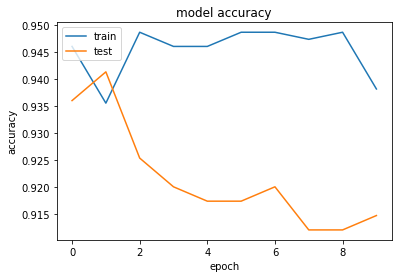

In [0]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()